# Titanic Data

## What factors meant that people were more likely to survive? 

It is relatively well known that a higher percentage of women passengers survived, but are there other factors, such as class, or age, that were also important in the likelyhood that a passenger would survive?

Below is an exploration of the passenger information provided, from 891 of the 2224 passengers and crew onboard the Titanic.

In [1]:
# Importing necessary libraries and reading in the csv file
import pandas as pd
import numpy as np

titanic_data = pd.read_csv('titanic-data.csv')

titanic_data.head()  # to get an idea of the data included in the file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Male versus female survival rates

First I will explore the effect of gender on survival rates, using the .groupby function to group by gender.

In [2]:
#using .count to find out how many males and female in the data set, and to get an idea about the completeness of the data.

titanic_grouped_by_sex = titanic_data.groupby('Sex')

titanic_grouped_by_sex.count()  

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


Looking at the above table it seems that out of the 891 passengers in the dataset, 314 were female and 577 male. Most columns of the dataset are complete, except some ages are unknown, most of the cabins of the passengers are unknown, and there are two missing values for the port at which two female passengers embarked.

The 'Survived' column is made up of '1' or '0' depending upon whether the passenger survived or not. By adding up the values in this column, the number of passengers that survived can be found.

In [3]:
titanic_m_f_survivors = titanic_data.groupby('Sex')['Survived'].sum()

titanic_m_f_survivors

Sex
female    233
male      109
Name: Survived, dtype: int64

In [4]:
percentage_m_f_survivors = (titanic_m_f_survivors.div(titanic_grouped_by_sex['PassengerId'].count()))*100

percentage_m_f_survivors

Sex
female    74.203822
male      18.890815
dtype: float64

Out of the dataset provided, there were a total of 342 survivors, giving a survival rate of just over 38 %. Of these, 233 were female passengers, accounting for approximately 74 % of the female passengers onboard the ship, whilst only 109 were male passengers, accounting for just under 19 % of the male passengers onboard. 

Put another way, although male passengers made up nearly 65 % of the total passengers onboard the Titanic, just under 32 % of the survivors were male.

### Did ticket class affect a passenger's survival rate?

I was interested to know more about this data set, specifically, within the male and female survivor groups, how did the demographic vary in terms of ticket class.

In [5]:
# First I looked at the class breakdown of all passengers onboard, grouped by male and female
titanic_classes_numbers = titanic_data.groupby(['Sex', 'Pclass'])['PassengerId'].count()
print (titanic_classes_numbers)

titantic_classes_percent = (titanic_classes_numbers.div(titanic_grouped_by_sex['PassengerId'].count()))*100
titantic_classes_percent

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: PassengerId, dtype: int64


Sex     Pclass
female  1         29.936306
        2         24.203822
        3         45.859873
male    1         21.143847
        2         18.717504
        3         60.138648
Name: PassengerId, dtype: float64

In [6]:
# I then looked at the class breakdown of the survivors, grouped by male and female
titanic_classes_numbers_survived = titanic_data.groupby(['Sex', 'Pclass'])['Survived'].sum()
print (titanic_classes_numbers_survived)

titantic_classes_percent_survived = (titanic_classes_numbers_survived.div(titanic_m_f_survivors))*100
titantic_classes_percent_survived

Sex     Pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: Survived, dtype: int64


Sex     Pclass
female  1         39.055794
        2         30.042918
        3         30.901288
male    1         41.284404
        2         15.596330
        3         43.119266
Name: Survived, dtype: float64

In both the male and females groups, a higher proportion of first class passengers were saved, compared to the proportion of first class passengers onboard. Interestingly, 45 out of the 109 male survivors were travelling in first class, 41 % of the male survivors, even though only 21 % of male passengers were travelling in this class.

The differences between total number of passengers and the number of survivors from each class can be more easily communicated using a visualisation.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
#function to define style of pie chart subplots
def plot_subplot(data):
    return plt.pie(data, colors=['navy', 'powderblue', 'darkturquoise'], labels=['first', 'second', 'third'], labeldistance=1.1, startangle=90, counterclock=False)

([<matplotlib.patches.Wedge at 0x17684d31c18>,
  <matplotlib.text.Text at 0x17684d44be0>])

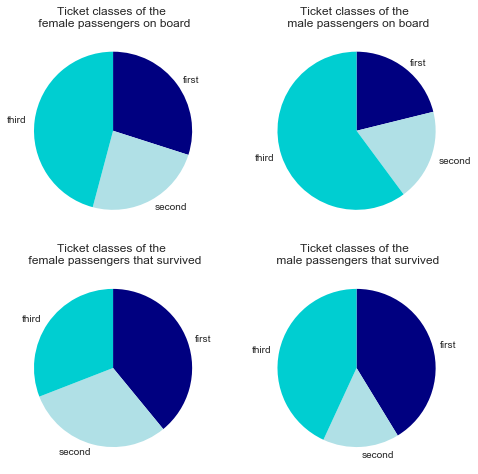

In [9]:
plt.figure(figsize=(8, 8))
plt.subplot(221, title='Ticket classes of the \n female passengers on board', aspect=1)
plot_subplot(titantic_classes_percent['female'])

plt.subplot(222, title='Ticket classes of the \n male passengers on board', aspect=1)
plot_subplot(titantic_classes_percent['male'])

plt.subplot(223, title='Ticket classes of the \n female passengers that survived', aspect=1)
plot_subplot(titantic_classes_percent_survived['female'])

plt.subplot(224, title='Ticket classes of the \n male passengers that survived', aspect=1)
plot_subplot(titantic_classes_percent_survived['male'])

By comparing the visualisations above, it can be seen that although the largest proprotion of passengers in both the male and female groups were travelling in third class, this proportion shrinks when compared to the ticket class of the survivors. Those that travelled in first class made up a far higher percentage of the survivors then would be reflected by the proportion of first class passengers.

### Did age affect a passenger's survival rate?
Continuing to explore the data, I studied whether the age of a passenger reflected how likely the passenger was to survive.

In [10]:
#using the .describe function to get a general idea about the data
titanic_ages = titanic_data.groupby(['Sex', 'Survived'])['Age']

titanic_ages.describe()

Sex     Survived       
female  0         count     64.000000
                  mean      25.046875
                  std       13.618591
                  min        2.000000
                  25%       16.750000
                  50%       24.500000
                  75%       33.250000
                  max       57.000000
        1         count    197.000000
                  mean      28.847716
                  std       14.175073
                  min        0.750000
                  25%       19.000000
                  50%       28.000000
                  75%       38.000000
                  max       63.000000
male    0         count    360.000000
                  mean      31.618056
                  std       14.056019
                  min        1.000000
                  25%       21.750000
                  50%       29.000000
                  75%       39.250000
                  max       74.000000
        1         count     93.000000
                  mean    

Looking at the data shown above, it seems that the mean and quartile ranges do not vary significantly between those that survived and those that did not. The standard deviation of each dataset is relatively large at between 13.6 and 16.5. 

To futher check for any relationships between survival and age, I plotted the data in the form of a number of histograms to help visualise the age distribution of the passengers.

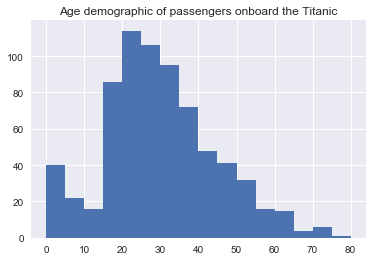

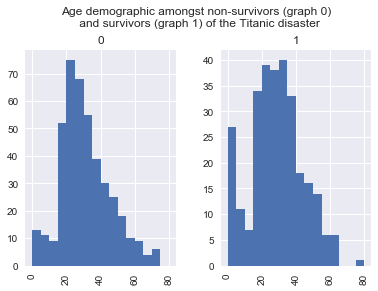

In [11]:
#creating histograms to look at the distribution of ages amongst all on board the Titanic and also amongst
#those that survived and those that did not.
#Data is first cleaned using .dropna() to remove any NaN values.

titanic_data['Age'].dropna().hist(bins=16, range=(0,80));
plt.title('Age demographic of passengers onboard the Titanic')
titanic_data['Age'].dropna().hist(by=titanic_data['Survived'], bins=16, range=(0,80))
plt.suptitle('Age demographic amongst non-survivors (graph 0) \n and survivors (graph 1) of the Titanic disaster', y=1.05)

Comparing the graphs above it can be seen that for those aged under 10, more passengers survived than did not, something which is not true for any other age group. Other than this, both the graphs for those that survived and those that did not show a similar distribution of ages to the general population of passengers aboard the ship. 

To investigate further the survival rates of the children onboard the titanic, I was interested in looking further into the data to explore if those with parents or siblings on board (identified in the dataset by 'Parch' > 0) were more likely to survive.

### Did the number of siblings and parents a passenger had onboard affect the likelyhood of survival?

Below I have grouped the data by 'Parch' to explore this question.

In [12]:
#first looking at the number of entries in the dataset with Parch > 0
titanic_grouped_by_parch = titanic_data.groupby('Parch')['PassengerId'].count()

titanic_grouped_by_parch

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: PassengerId, dtype: int64

There were a total of 213 passengers onboard that also had at least one parent and/or sibling onboard.

In [13]:
titanic_parch_and_survived = titanic_data.groupby('Parch')['Survived'].sum()

titanic_parch_and_survived 

Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64

In [14]:
survival_rates_by_parch = (titanic_parch_and_survived / titanic_grouped_by_parch)*100
survival_rates_by_parch

Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
dtype: float64

Within this dataset, the overall survival rate for the passengers onboard the Titanic was just over 38 %. Comparing this value to the data above, it does seem as if having 1, 2 or 3 parents and/or siblings also onboard did increase ones chances of survival. However, having more than this resulted in the opposite effect.

## Conclusions

This report has explored how the gender, ticket class and age of a passenger aboard the Titanic, as well as the number of parents and/or children also onboard, reflected the likelihood that a passenger would have survived the disaster. 

No statistical analysis has been undertaken, and so no conclusions can be made as to the statistic significance of the findings, however, interesting conclusions can be made nonetheless.

Female passengers were far more likely than their male counterparts to survive, with 74 % of the female passengers onboard the ship surviving, whilst just under 19 % of the male passengers did so. Amongst both the male and female passengers, those traveling in first class were more likely to survive than those travelling in third.

The likelihood of survival was less correlated to age, apart from those who were aged less than 10 for who there did seem to be some advantage. This led me to explore if there was a relationship between travelling with parents and/or siblings and survival. It seems that travelling with between 1 and 3 close relatives did indeed increase the likelyhood of survival, however, for numbers above this the opposite seemed to be true.

## Note:

No other resourses were used in creating this submission.